In [ ]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Dataset link
#https://drive.google.com/drive/folders/1L3xiKJAe5XgobQGV-CFShJoss8h1NakC?usp=sharing

# This script was deleveped on google colab. Some minor changes required to execute the same in local machine.

In [ ]:
cv2.__version__

'4.1.2'

In [ ]:
# For working in colab, we need to mount the google drive, so that we can access any data file from the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading the file from content drive location
img=cv2.imread('/content/drive/MyDrive/open_cv_images/cameraman.png')
img.shape

(256, 256, 3)

In [ ]:
from google.colab.patches import cv2_imshow

#cv2.imshow('screen1',img)
#cv.waitKey(0)
#cv2.destroyAllWindows()

# the above three lines is for displaying an image in local machine using open cv

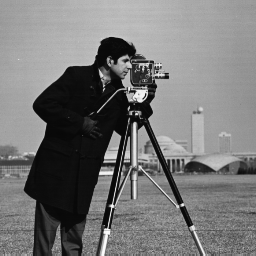

In [ ]:
cv2_imshow(img)

In [ ]:
img=img[:,:,0]

In [ ]:
img.shape

(256, 256)

In [ ]:
img.dtype

dtype('uint8')

In [ ]:
# Increase the brightness of the image
img1=img.astype('float')
img2=img1+100
img2[img2>255]=255

In [ ]:
img1[0,0],img2[0,0]

(156.0, 255.0)

In [ ]:
res_img=np.hstack((img1,img2))

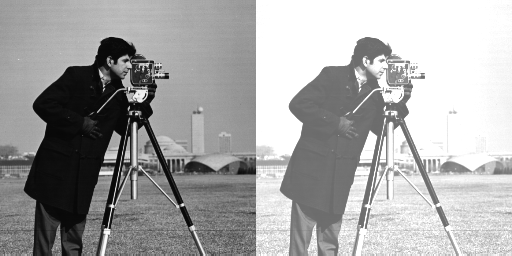

In [ ]:
cv2_imshow(res_img)

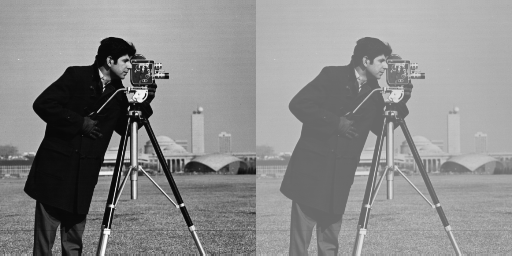

In [ ]:
# Increase the brightness of the image
img1=img.astype('float')
img2=0.5*img1+100
img2[img2>255]=255
res_img=np.hstack((img1,img2))
cv2_imshow(res_img)

In [ ]:
imgn=img1/255 # scaled

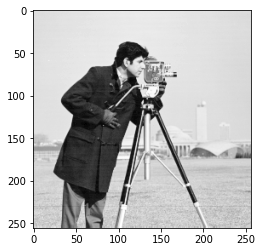

In [ ]:
img_log=np.log(imgn)
#cv2_imshow(img_log)
#res_img=np.hstack((img1,img2,img_log))
plt.imshow(img_log,cmap='gray')

In [ ]:
img3=255-img1

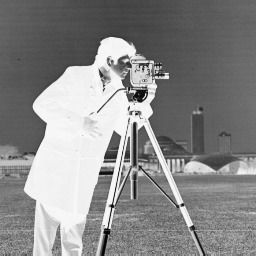

In [ ]:
cv2_imshow(img3)

In [ ]:
# Histogram Equilization
# Histogram Specification
# Adaptive Histogram equilization

In [ ]:
fruit=cv2.imread('/content/drive/MyDrive/open_cv_images/low_contrast_fruit_basket.jpg',0)

In [ ]:
fruit.shape

(131, 131)

In [ ]:
fruit.min(),fruit.max()

(92, 141)

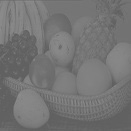

In [ ]:
cv2_imshow(fruit)

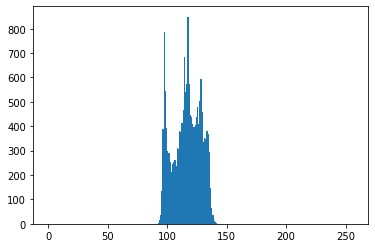

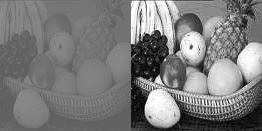

In [ ]:
img_eq=cv2.equalizeHist(fruit)
res=np.hstack((fruit,img_eq))
cv2_imshow(res)

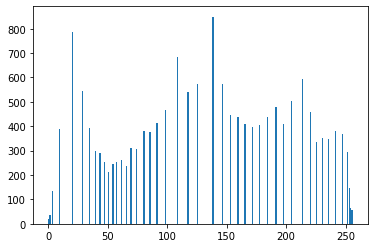

In [ ]:
plt.hist(img_eq.ravel(),256,[0,256])
plt.show()

In [ ]:
lung=cv2.imread('/content/drive/MyDrive/open_cv_images/noisy_lung.jpg',0)

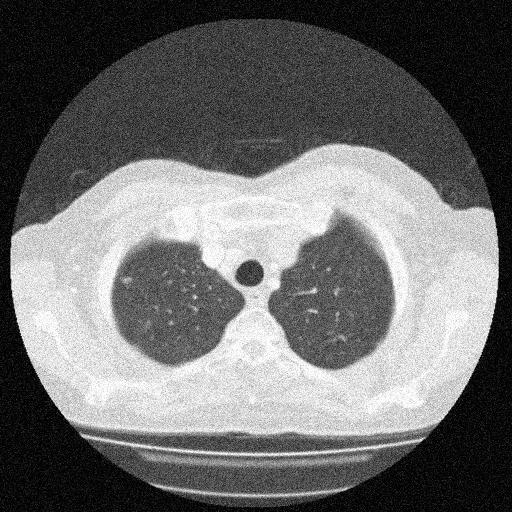

In [ ]:
cv2_imshow(lung)

In [ ]:
mask=np.ones((3,3),dtype='float')/9
filt=cv2.filter2D(lung,-1,mask)

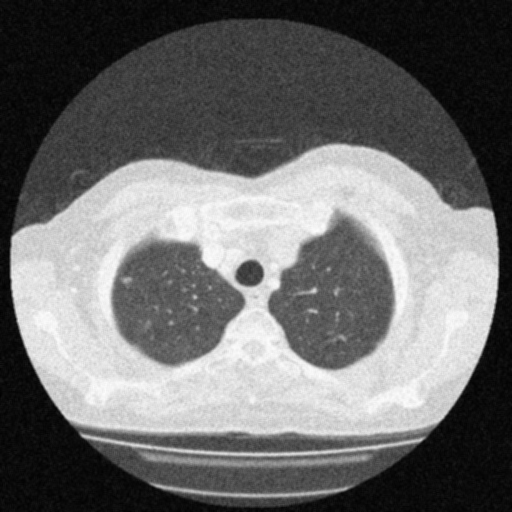

In [ ]:
cv2_imshow(filt)

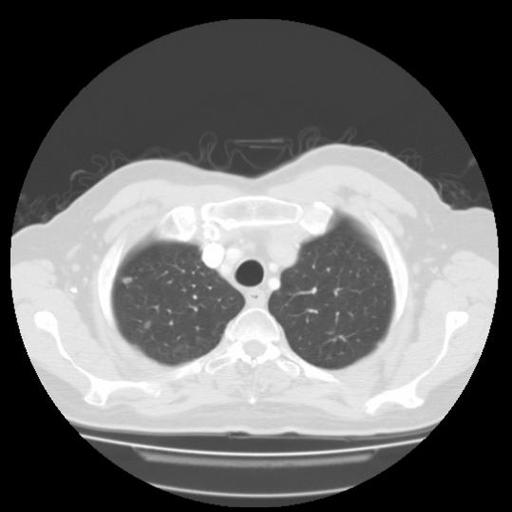

In [ ]:
lung1=cv2.imread('/content/drive/MyDrive/open_cv_images/3_nod.jpg',0)
cv2_imshow(lung1)

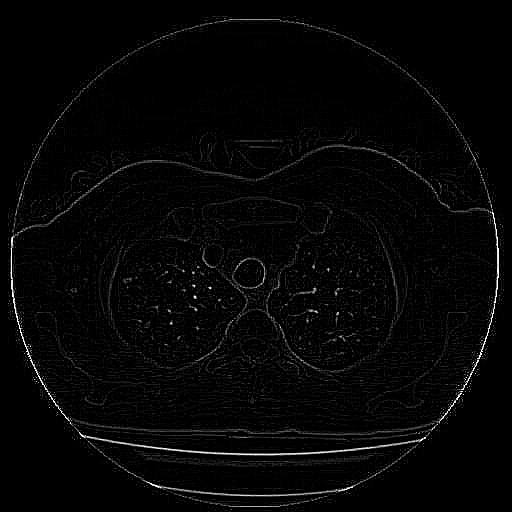

In [ ]:
mask=np.matrix('-1 -1 -1;-1 8 -1;-1 -1 -1')
filt=cv2.filter2D(lung1,-1,mask)
cv2_imshow(filt)

In [ ]:
img=cv2.imread('/content/drive/MyDrive/open_cv_images/mri_tumor1.jpg',0)

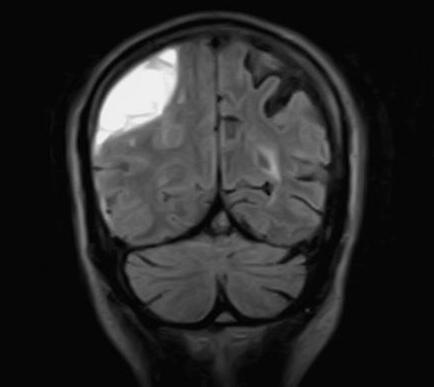

In [ ]:
cv2_imshow(img)

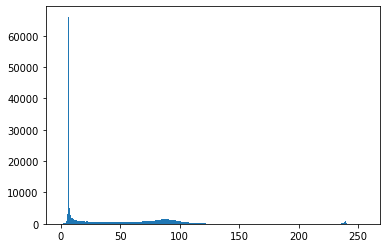

In [ ]:
plt.hist(img.ravel(),256,[0,256])
plt.show()

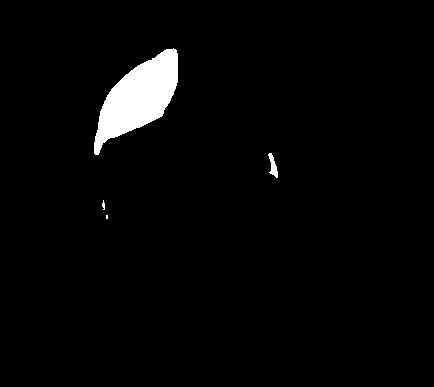

In [ ]:
img=cv2.imread('/content/drive/MyDrive/open_cv_images/mri_tumor1.jpg',0)
img[img>140]=255
img[img<=140]=0
cv2_imshow(img)

In [ ]:
#Morphological Operations
#Dilation, Erosion, clear border, skeltenization, thickining, thinning, areaopen, closing

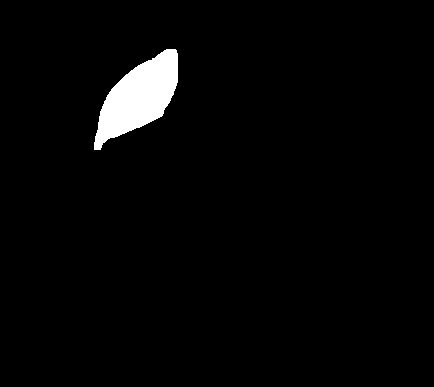

In [ ]:
se1=cv2.getStructuringElement(cv2.MORPH_RECT,(7,7))
mask=cv2.morphologyEx(img,cv2.MORPH_OPEN,se1)
cv2_imshow(mask)

In [ ]:
# feature Extraction
# Shape feat, Texture feat, color feat

In [ ]:
# Area of RoI = Number of pixels forming that RoI
ar=(mask!=0).sum()
ar

4448

In [ ]:
# Max Height and Max Width
# count the number of non zero pixels in each column in the image and pick the max count.
max_h=(mask!=0).sum(axis=0).max()
max_w=(mask!=0).sum(axis=1).max()

In [ ]:
max_h,max_w

(65, 66)

In [ ]:
#eccentricity
ecc=max_h/max_w
ecc

0.9848484848484849

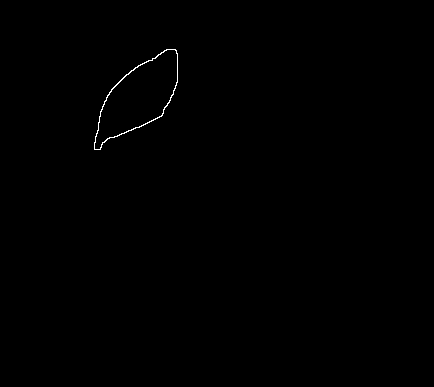

366

In [ ]:
# Permieter
m=np.matrix('-1 -1 -1;-1 8 -1;-1 -1 -1')
edge=cv2.filter2D(mask,-1,m)
cv2_imshow(edge)
peri=(edge!=0).sum()
peri

In [ ]:
#centroid
mom=cv2.moments(mask)
x_cent=np.round(mom['m10']/mom['m00'])
y_cent=np.round(mom['m01']/mom['m00'])
print(x_cent,y_cent)

138.0 97.0


In [ ]:
contours,_=cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

In [ ]:
cnt=contours[0]

In [ ]:
cnt_ar=cv2.contourArea(cnt)
cnt_ar

4315.5

In [ ]:
hull=cv2.convexHull(cnt)
hull_ar=cv2.contourArea(hull)
hull_ar

4562.5

In [ ]:
(x,y),rad=cv2.minEnclosingCircle(cnt)
rad

64.3448715209961

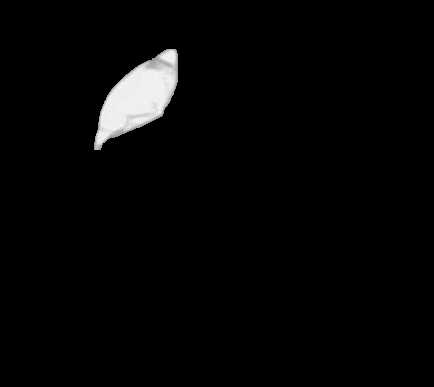

In [ ]:
# Texture features
#mean, var, std, skew, 
img=cv2.imread('/content/drive/MyDrive/open_cv_images/mri_tumor1.jpg',0)
mask=mask/255
tum=img*mask
cv2_imshow(tum)

In [ ]:
me=np.mean(tum[tum!=0])
me

221.9878597122302

In [ ]:
sd=np.std(tum[tum!=0])
sd

25.997005155860634

In [ ]:
import scipy.stats as stats
sk=stats.skew(tum[tum!=0])
sk

-1.5558808873285652

In [ ]:
feat=np.array([ar,max_h,max_w,ecc,peri,x_cent,y_cent,cnt_ar,hull_ar,rad,me,sd,sk])

In [ ]:
feat=pd.DataFrame(feat)

In [ ]:
feat

,0
0,4448.000000
1,65.000000
2,66.000000
3,0.984848
4,366.000000
5,138.000000
6,97.000000
7,4315.500000
8,4562.500000
9,64.344872


In [ ]:
#Say if u have 1000 images, u can calculate these 13 features for each image and can generate the dataset of size 1000x13
# frame the output coolum for each image with the help of radiologist report
# With this build any ML model to predict the cancerous nature of tumor